이번에는 2021년 2학기에 마케팅 애널리틱스를 수강하며 '서부산 관광지의 마케팅 전략'을 주제로 실시한 팀 프로젝트를 정리하려고 합니다. 오늘은 프로젝트의 개요를 간략하게 설명하고, 데이터를 수집하기 위해 리뷰를 크롤링한 과정에 대한 코드에 대해 글을 작성해보려고 합니다.

먼저 전체 프로젝트에서는 Google Maps, Tripadvisor, 네이버 지도, Visit Busan 4개의 사이트에서 리뷰를 수집하였지만, 저는 [트립 어드바이저](https://www.tripadvisor.co.kr/)를 담당하였습니다. 따라서 트립 어드바이저에서 리뷰를 크롤링하는 방법에 대해서만 코드를 작성할 예정입니다.

그리고 본 코드는 2021년 하반기에 작성한 코드이기때문에, 지금은 정상적으로 작동하지 않을 수 있다는 점 참고 부탁드리겠습니다.

# 프로젝트 개요

## 프로젝트 배경

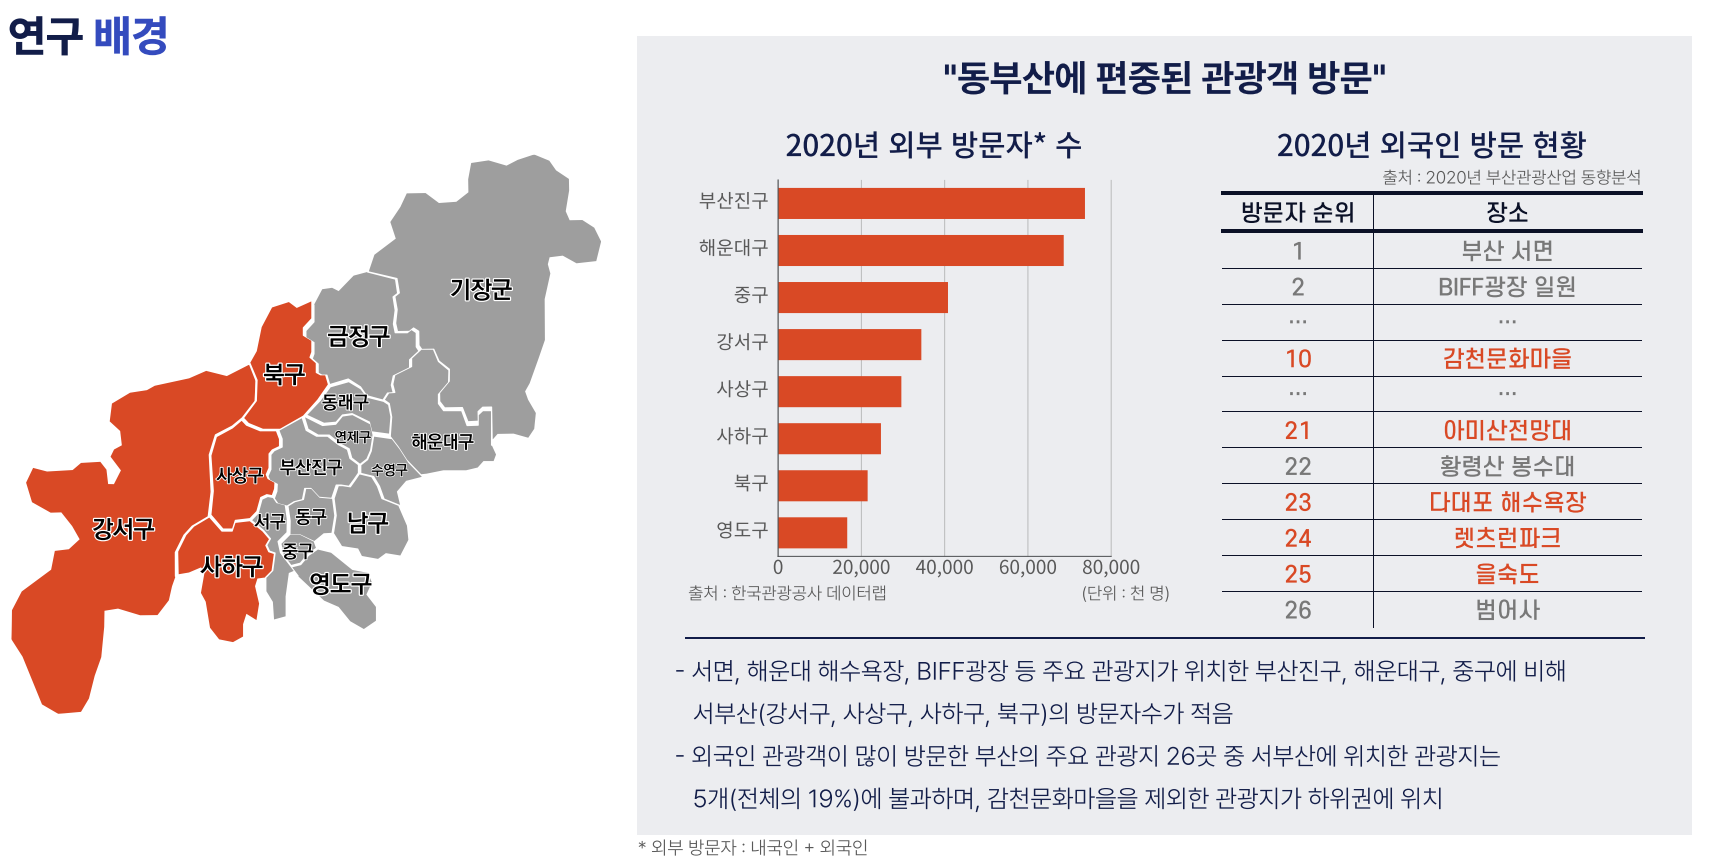

2020년의 부산 지역의 외부 방문자 수와 외국인 방문 현황을 살펴보면, 서면, 해운대, BIFF 광장 등 주요 관광지가 위치한 부산 진구, 해운대, 중구에 비해 서부산(강서구, 사상구, 사하구, 북구)의 방문자수가 적은 것을 확인할 수 있습니다.

또한 외국인 관광객이 많이 방문한 부산의 주요 관광지 26곳 중 서부산에 위치한 관광지는 전체의 19%인 5개에 불과했으며, 감천 문화마을을 제외한 나머지 관광지는 전부 하위권에 위치한 것을 확인하였습니다.

## 프로젝트 설계

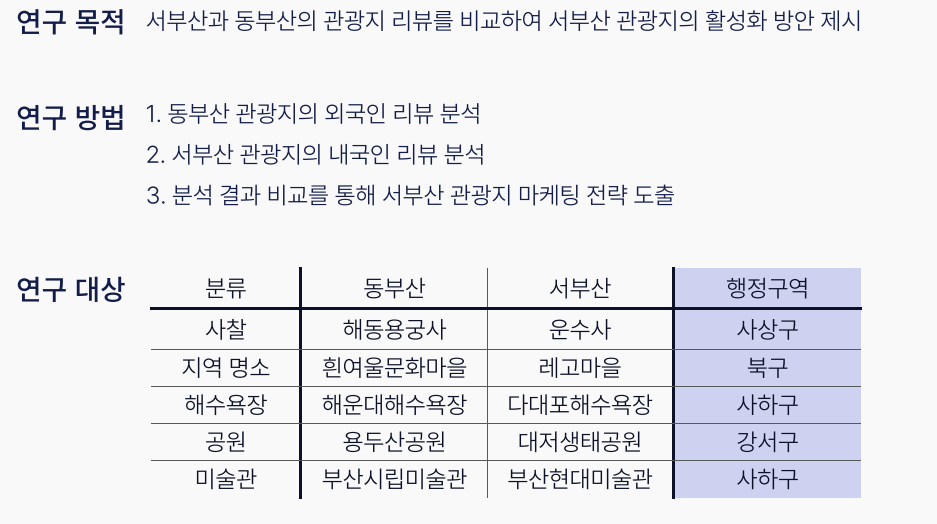

따라서 이번 프로젝트에서는 서부산과 동부산 관광지의 리뷰를 비교하고, 서부산 관광지의 활성화 방안을 제시하고자 하였습니다.

서부산 관광지의 마케팅 전략을 도출하기 위해 동부산의 유명 관광지 5개를 선정하여 적절한 카테고리로 나눈 후, 카테고리에 따라 서부산 관광지를 5개 선정하였습니다. 선정된 10개의 관광지의 리뷰를 수집하여 텍스트 분석 결과를 비교하고, 마케팅 전략을 도출하는 방식으로 프로젝트를 진행하였습니다.

## 프로젝트 프레임 워크

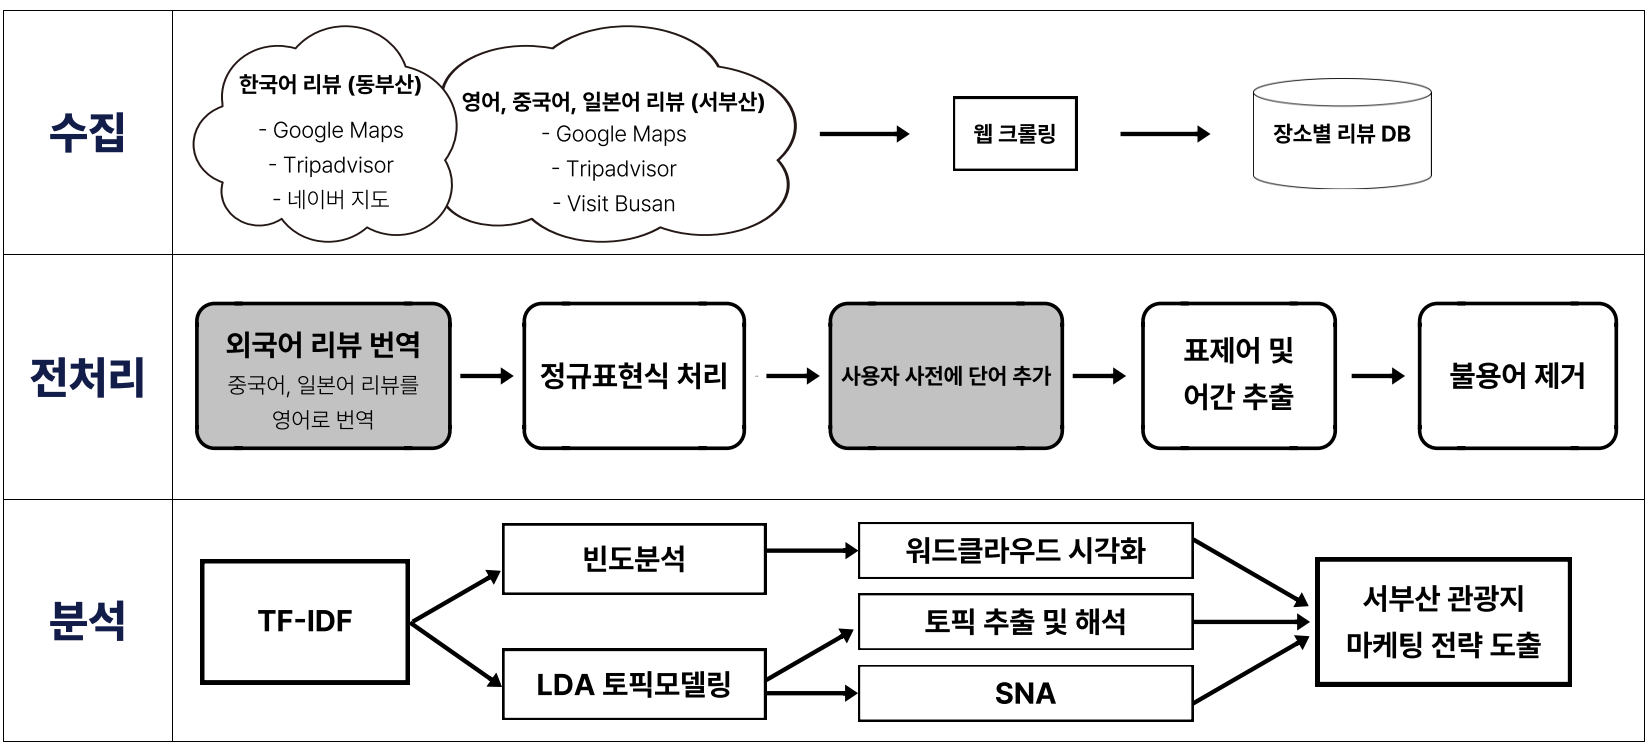

프로젝트의 프레임워크는 위와 같습니다. 이때, 동부산 관광지의 경우에는 내국인과 외국인의 리뷰가 둘 다 충분히 존재하지만, 서부산 관광지의 경우에는 외국인 리뷰가 적거나 없는 문제가 존재하였습니다. 따라서 동부산 관광지는 외국인의 리뷰를 수집하고, 서부산 관광지는 내국인 리뷰를 수집하여 텍스트 분석 결과를 비교하는 방식으로 프로젝트를 기획하였습니다.

오늘은 이 중에서 수집 ~ 외국어 리뷰 번역까지의 과정에서 사용한 코드를 정리해보도록 하겠습니다.

# 데이터 수집

## 데이터 수집 방법

데이터는 구글 맵스, 트립 어드바이저, 네이버 지도, visit busan에 작성된 리뷰를 Python의 Selenium과 Beautifulsoup 라이브러리를 통해 크롤링하여 수집하였습니다. Selenium은 웹 브라우저를 자동화하여 동적 크롤링을 수행하는 데 사용하며, Beautifulsoup는 웹 페이지에서 가져온 HTML 혹은 XML에서 데이터를 특정 형식에 맞게 추출하기 위해 사용합니다.

webdriver로 각 관광지의 리뷰, 작성날짜, 별점을 수집하였으며, 외국인 리뷰는 영어, 중국어, 일본어로 작성된 리뷰만을 수집하였습니다. 그리고 분석을 위해 중국어와 일본어로 작성된 리뷰는 영어로 번역하여 텍스트 분석을 실시할 예정입니다.

## Tripadvisor 크롤링

실제 프로젝트에서는 10개의 관광지를 대상으로 한국어, 영어, 중국어(간체, 번체), 일본어로 작성된 리뷰를 모두 수집하였습니다. 하지만 10개 장소에 모두 같은 코드를 반복하여 사용했기 때문에, 이번 게시글에서는 해동용궁사만을 예시로 보여드리겠습니다.

In [2]:
import pandas as pd
import time
import os
from selenium import webdriver
from bs4 import BeautifulSoup
from googletrans import Translator
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import warnings
from review import *    # 사용자 정의 함수

warnings.filterwarnings('ignore')

여기서 review는 이번 프로젝트를 위해 제가 만든 함수를 모아둔 모듈입니다. 자세한 함수 구현 과정이 궁금하신 분들은 [제 깃허브](https://github.com/eunju-choe/eunju-choe/blob/main/PNU_class%20note/MarketingAnalytics/review.py)를 확인해주세요.

먼저 관광지별로 tripadvisor의 리뷰가 있는 페이지 URL을 저장한 csv 파일을 불러옵니다.

In [3]:
df_url = pd.read_csv('tripadvisor_url.csv', encoding='CP949')
df_url.head()

,장소,url
0,해동용궁사,https://www.tripadvisor.co.kr/Attraction_Revie...
1,흰여울길,https://www.tripadvisor.co.kr/Attraction_Revie...
2,흰여울문화마을,https://www.tripadvisor.co.kr/Attraction_Revie...
3,해운대,https://www.tripadvisor.co.kr/Attraction_Revie...
4,용두산공원,https://www.tripadvisor.co.kr/Attraction_Revie...


**tripadvisor_review(driver_path, url, language, save_path, loc_name)**

위의 함수는 tripadvisor의 리뷰를 크롤링하는 함수로, 수집 결과를 데이터프레임의 형태로 반환하며 동시에 csv 파일로 저장합니다. 함수의 입력값은 다음과 같습니다.
- driver_path : chrome driver path
- url : tripadvisor review url
- language : 리뷰 언어 ('kr', 'en', 'ch', 'ch2', 'jp')
- save_path : 수집 결과 저장 경로
- loc_name : 장소 이름 (파일명으로 사용)

트립 어드바이저는 선택한 언어의 리뷰를 모두 보여준 경우에는 다른 언어 리뷰를 자동으로 번역하여 제공합니다. 따라서 다른 언어를 번역한 리뷰가 등장하면 해당 언어에 대한 리뷰 수집을 자동으로 멈추도록 하였습니다.

추가로 리뷰의 마지막 부분에는 자동으로 번역된 리뷰도 함께 수집됩니다. 이 부분은 크롤링이 끝난 후, 저장된 csv 파일에서 직접 제거하는 게 빨라 프로그래밍으로는 생략하였습니다.

이제 tripadvisor_review 함수를 사용해 해동용궁사의 리뷰를 수집해보도록 하겠습니다.

In [ ]:
driver_path = 'E:/chromedriver_nb.exe'
url = df_url.loc[0, 'url']
loc_name = df_url.loc[0, '장소']
save_path = 'Result_tripadvisor'
lggs = ['ch', 'ch2', 'en', 'jp']

for language in lggs:
    tripadvisor_review(driver_path, url, language, save_path, loc_name)
    print('')

위의 코드를 실행하여 해동용궁사의 중국어(간체, 번체), 영어, 일본어 리뷰를 각각 수집하여 저장하였습니다. 전체 프로젝트에서는 위의 작업을 관광지별로 반복하여 트립 어드바이저의 리뷰를 모두 수집하였습니다. 참고로 용궁사는 동부산 관광지이기에 한국어 리뷰는 수집하지 않았으며, 서부산 관광지의 경우에는 한국어 리뷰만 수집하였습니다.

# 1차 전처리

앞서 언급한 것처럼 프로젝트에서는 외국인 리뷰로 영어, 중국어, 일본어로 작성된 리뷰를 수집하였으며, 중국어와 일본어로 작성된 리뷰를 영어로 번역하여 영어 텍스트 분석을 실시하였습니다. 번역을 하기에 앞서 일차적으로 전처리를 실시하였습니다.

1차 전처리에서는 언어별로 다른 언어로 작성된 리뷰를 삭제하고, 각 언어로 작성된 리뷰의 정보를 영어로 통일하고 형식을 통일하는 작업을 실시하였습니다. 1차 전처리를 위해 kr_1st_process(), (ch, ch2, en, jp 전부 동일) 함수를 활용하였습니다.

In [ ]:
# 중국어(간체)
yong_ch = pd.read_csv('Result_tripadvisor/해동용궁사_ch.csv')
yong_ch = yong_ch.iloc[:227, ]
yong_ch = ch_1st_process(yong_ch)
yong_ch.to_csv('Result_tripadvisor/해동용궁사_ch_1.csv', index=False)

# 중국어(번체)
yong_ch2 = pd.read_csv('Result_tripadvisor/해동용궁사_ch2.csv')
yong_ch2 = yong_ch2.iloc[:216, ]
yong_ch2 = ch2_1st_process(yong_ch2)
yong_ch2.to_csv('Result_tripadvisor/해동용궁사_ch2_1.csv', index=False)

# 영어
yong_en = pd.read_csv('Result_tripadvisor/해동용궁사_en.csv')
yong_en = yong_en.iloc[:1045, ]
yong_en = en_1st_process(yong_en)
yong_en.to_csv('Result_tripadvisor/해동용궁사_en_1.csv', index=False)

# 일본어
yong_jp = pd.read_csv('Result_tripadvisor/해동용궁사_jp.csv')
yong_jp = yong_jp.iloc[:335, ]
yong_jp = jp_1st_process(yong_jp)
yong_jp.to_csv('Result_tripadvisor/해동용궁사_jp_1.csv', index=False)

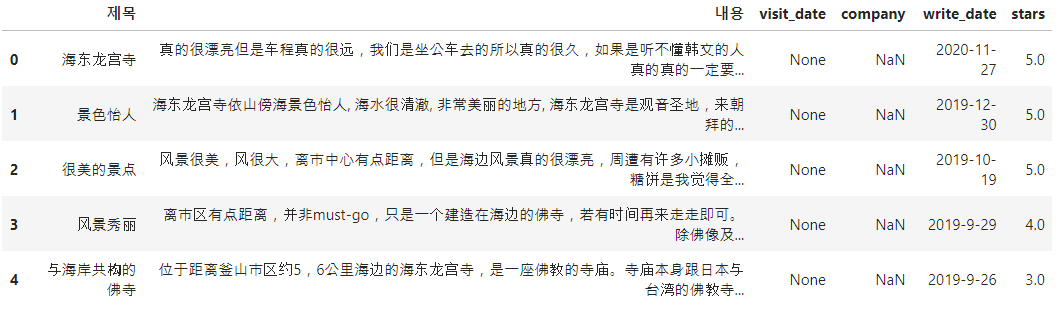

1차 전처리된 중국어 리뷰를 예시로 보여드리면 위와 같습니다. 다음과 같이 데이터가 수집되고 전처리까지 완료되었습니다.

# 2차 전처리 - 번역

1차 전처리를 마친 중국어와 일본어 리뷰를 영어로 번역하였습니다. 번역을 할 때에는 Google Translate API를 활용할 수 있는 GoogleTrans 패키지를 사용하였습니다. 각 언어에서 모두 동일한 방식을 반복하여 번역을 진행하였기 때문에, 일본어를 번역하는 예시만 보여드리도록 하겠습니다.

In [ ]:
translator = Translator()

df = pd.read_csv('Result_tripadvisor/해동용궁사_jp_1.csv')

df['title'] = df['제목'].apply(lambda x : translator.translate(x).text)
df['contents'] = df['내용'].apply(lambda x : translator.translate(x).text)

df = df.drop(['제목', '내용'], axis = 1)
df.to_csv('Result_tripadvisor/해동용궁사_jp_2.csv', index = False)

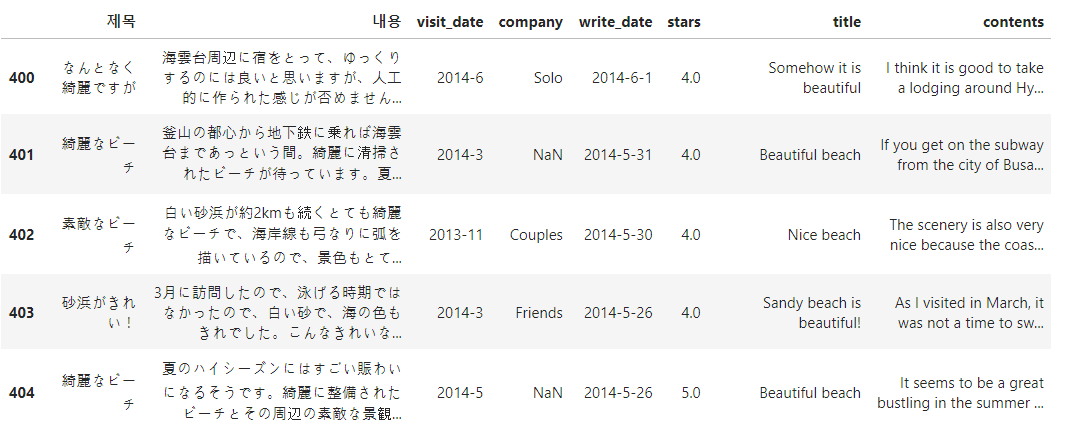

원본 데이터가 없는 관계로 현재 코드를 실행할 수 없습니다. 그래서 예시로 해운대의 일본어 리뷰를 영어로 번역한 결과를 사진으로 보여드리겠습니다. 다음과 같이 중국어와 일본어 데이터를 영어로 모두 번역하였습니다.

# 언어별 리뷰 합치기

In [ ]:
df_ch = pd.read_csv('Result_tripadvisor/해동용궁사_ch_2.csv')
df_ch['LANGUAGE'] = 'C'
df_ch2 = pd.read_csv('Result_tripadvisor/해동용궁사_ch2_2.csv')
df_ch2['LANGUAGE'] = 'C'
df_en = pd.read_csv('Result_tripadvisor/해동용궁사_en_2.csv')
df_en['LANGUAGE'] = 'E'
df_jp = pd.read_csv('Result_tripadvisor/해동용궁사_jp_2.csv')
df_jp['LANGUAGE'] = 'J'

# 데이터 프레임 병합
df = pd.concat([df_ch, df_ch2, df_en, df_jp])

# 데이터 형 변환
df['visit_date'] = df['visit_date'].astype('datetime64')
df['write_date'] = df['write_date'].astype('datetime64')

# 파일 저장
df.to_csv('Result_tripadvisor/final/해동용궁사.csv', index = False)

장소별로 모든 리뷰를 하나의 파일로 합치는 과정을 마지막으로 트립 어드바이저의 리뷰를 모두 수집할 수 있었습니다.

# 데이터 전체 통합

제가 트립 어드바이저의 리뷰를 수집하는 동안, 다른 팀원들도 각자 다른 사이트에서 리뷰를 수집하고 영어로 번역하였습니다. 각자 수집한 리뷰를 장소별로 하나의 파일로 통합하도록 하겠습니다. 이 역시 모든 관광지에 동일한 방법을 반복하였기 때문에, 해동용궁사의 경우만 예시로 보여드리겠습니다.

In [ ]:
# tripadvisor
df1 = pd.read_csv('해동용궁사_tripadvisor.csv')
# 제목과 본문 합치기
df1['REVIEW'] = df1['TITLE'] + ' ' + df1['TEXT']
df1 = df1[['DATE', 'RATING', 'REVIEW', 'LANGUAGE']]

# visit busan
df2 = pd.read_csv('해동용궁사_visitbusan.csv')

# google maps
df3 = pd.read_csv('해동용궁사_외국어.csv')

df = pd.concat([df1, df2, df3])
df.to_csv('yonggungsa final.csv', index=False)

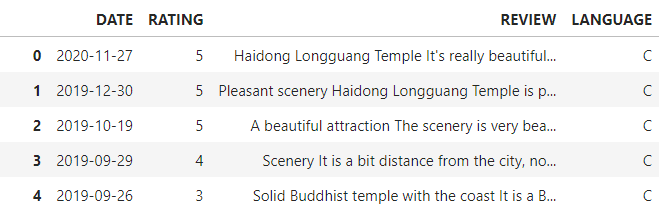

트립 어드바이저만 리뷰가 제목과 본문으로 구성되어있는 관계로, 제목과 본문을 하나의 컬럼으로 합쳐주었습니다. 그리고 3개의 사이트에서 수집한 리뷰를 하나의 파일로 통합하여 저장하였습니다. 이 과정을 10번 반복하여 데이터 수집이 완료되어 분석 준비가 완료되었습니다.

그럼 오늘은 여기서 글을 마무리하고 다음 게시글에서는 텍스트마이닝에 대해 얘기해보도록 하겠습니다. 오늘도 긴 글 읽어주셔서 감사합니다 :)